In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("datasets/DSL-StrongPasswordData.csv", header = 0)

In [3]:
# Filter rows where subject is not equal to "s011" to keep in pwd_data
pwd_data = data[data['subject'] != 's011']

# Create a new dataset to test with rows where subject is "s011"
new_dataset = data[data['subject'] == 's011']

# Save the new dataset to a CSV file
new_dataset.to_csv("new_dataset.csv", index=False)
# subject = pd.read_csv("new_dataset.csv", header = 0)

# Print the first few rows of the filtered dataset
# print("Learning data:\n", pwd_data.head())

# Print the first few rows of the new dataset
# print("Verifying data\n", subject.head())

<Axes: title={'center': 'Average Keystroke Latency per Subject'}>

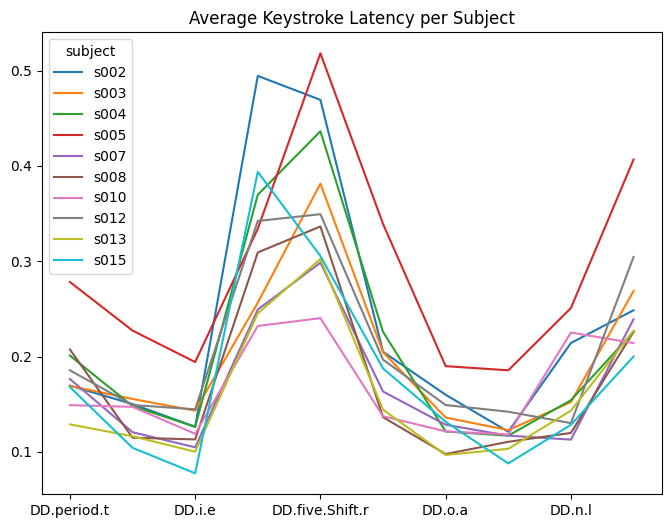

In [4]:
# Average Keystroke Latency per Subject

DD = [dd for dd in pwd_data.columns if dd.startswith('DD')]
plot = pwd_data[DD]
plot['subject'] = pwd_data['subject'].values
plot = plot.groupby('subject').mean()

plot.iloc[:10].T.plot(figsize=(8, 6), title='Average Keystroke Latency per Subject')

In [5]:
#  Split the dataset into train and test, test size == 20%
data_train, data_test = train_test_split(pwd_data, test_size = 0.2, random_state=40)

X_train = data_train[pwd_data.columns[2:]]
# print(X_train)
y_train = data_train['subject']
# print(y_train)
X_test = data_test[pwd_data.columns[2:]]
y_test = data_test['subject']

# Adjust data 
scaler = StandardScaler()
# Fit the scaler on the original data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)

knc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('K-Nearest Neighbor Classifier Accuracy:', knc_accuracy)

K-Nearest Neighbor Classifier Accuracy: 0.85


In [7]:
# Determining the Hyperparameters for model

current_params_knc = knc.get_params()
print("Current Hyperparameters for K-Nearest Neighbors Classifier:", current_params_knc)

Current Hyperparameters for K-Nearest Neighbors Classifier: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [8]:
svc = svm.SVC(kernel='linear') 
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Support Vector Linear Classifier Accuracy:', svc_accuracy)

Support Vector Linear Classifier Accuracy: 0.8545


In [9]:
# Determining the Hyperparameters for model

current_params_knc = svc.get_params()
print("Current Hyperparameters for SVC:", current_params_knc)

Current Hyperparameters for SVC: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [10]:
mlpc = MLPClassifier()
mlpc.fit(X_train,y_train)

y_pred = mlpc.predict(X_test)

mlpc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Multi Layer Perceptron Classifier Accuracy:', mlpc_accuracy)

Multi Layer Perceptron Classifier Accuracy: 0.9205


In [11]:
# Determining the Hyperparameters for model

current_params_knc = mlpc.get_params()
print("Current Hyperparameters for MLPC:", current_params_knc)

Current Hyperparameters for MLPC: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


Text(0, 0.5, 'True')

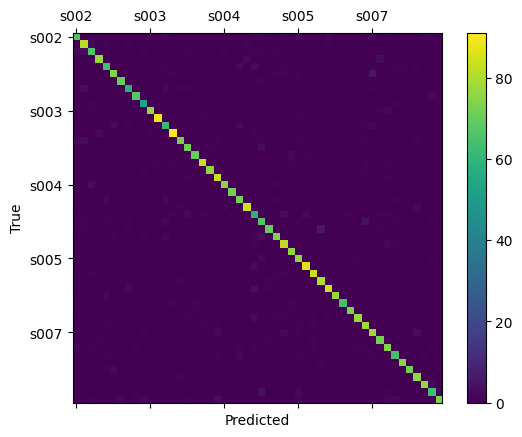

In [12]:
from sklearn.metrics import confusion_matrix

labels = list(pwd_data['subject'].unique())
cm = confusion_matrix(y_test, y_pred) 

figure = plt.figure()
axes = figure.add_subplot(111)
figure.colorbar(axes.matshow(cm))
axes.set_xticklabels([''] + labels)
axes.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [13]:
# Prepare a New Data for verification
X = new_dataset[new_dataset.columns[2:]]
X_n = pd.DataFrame(X).values
X_new = scaler.transform(X_n)
y_new = new_dataset['subject']

# Predict using the K-Nearest Neighbors Classifier
y_pred_knc = knc.predict(X_new)

# Predict using the Support Vector Classifier
y_pred_svc = svc.predict(X_new)

# Predict using the Multi-Layer Perceptron Classifier
y_pred_mlpc = mlpc.predict(X_new)

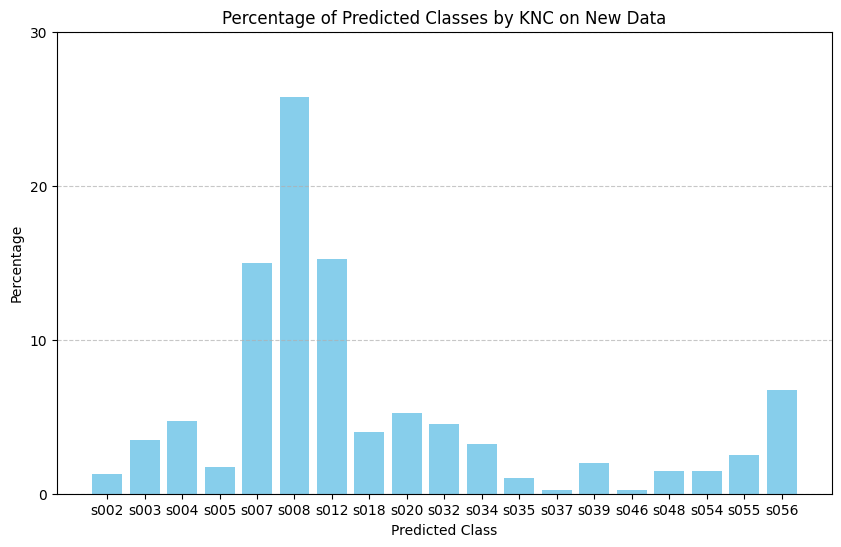

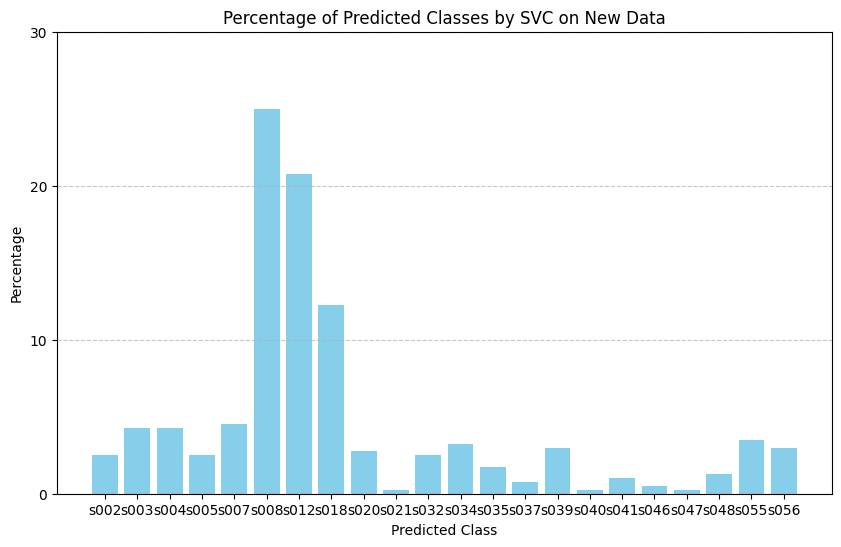

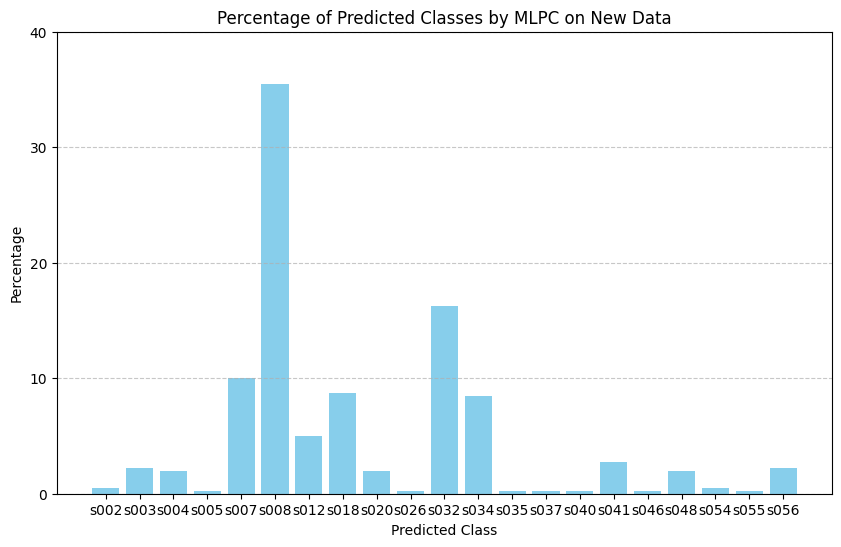

In [14]:
# Verifying of models by new data
def plot_prediction_histogram(y_pred, model_name):
    # Unique classes and their number
    unique_classes, class_counts = np.unique(y_pred, return_counts=True)

    # Percentage for each class
    class_percentages = class_counts / len(y_pred) * 100

    # Creating a hystogramm
    plt.figure(figsize=(10, 6))
    plt.bar(unique_classes, class_percentages, color='skyblue')
    plt.title(f'Percentage of Predicted Classes by {model_name} on New Data')
    plt.xlabel('Predicted Class')
    plt.ylabel('Percentage')
    plt.xticks(unique_classes)
    plt.yticks(np.arange(0, max(class_percentages) + 10, 10))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# A function call to plot a histogram for model predictions KNC
plot_prediction_histogram(y_pred_knc, 'KNC')

# A function call to plot a histogram for model predictions SVC
plot_prediction_histogram(y_pred_svc, 'SVC')

# A function call to plot a histogram for model predictions MLPC
plot_prediction_histogram(y_pred_mlpc, 'MLPC')